# 01. Importing libraries

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r"C:\Users\andyc\Achievement 4 Project"

In [4]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'new_ords_prods_merge.pkl'))

In [5]:
#checking for the name of the columns
ords_prods_merge.columns

Index(['Unnamed: 0_x', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Unnamed: 0.1', 'Unnamed: 0_y', 'order_id',
       'user_id', 'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', 'merge_',
       'price_range_loc', 'busiest_day', 'busiest_days', 'Slowest days',
       'Busiest_days', 'Slowest_days', 'busiest_period_of_day', 'Busy_days',
       'max_order', 'loyalty_flag', 'average_spending', 'spending_flag',
       'order_regularity', 'order_frequency_flag'],
      dtype='object')

#### Bar Chart

<Axes: xlabel='order_day_of_week'>

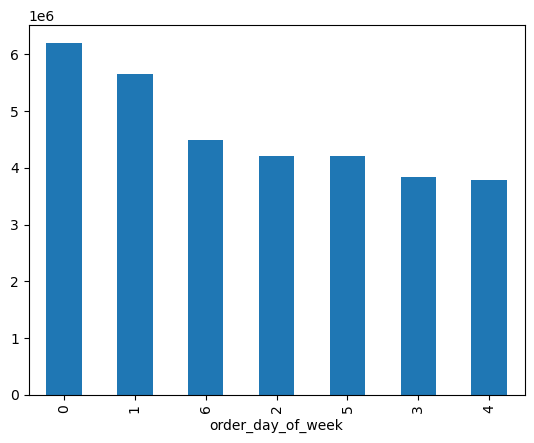

In [7]:
#creating a bar chart for the order_day_of_week column
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

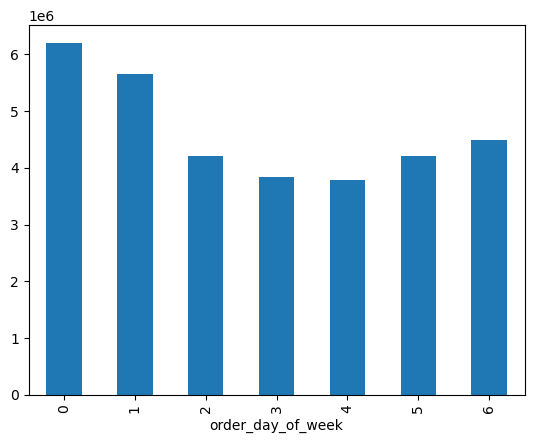

In [8]:
# sorting the bar chart
bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

In [9]:
#frequency
ords_prods_merge['order_day_of_week'].value_counts()

order_day_of_week
0    6204231
1    5660285
6    4496545
2    4213870
5    4205818
3    3840557
4    3783816
Name: count, dtype: int64

In [10]:
#sort index with frequency 
ords_prods_merge['order_day_of_week'].value_counts().sort_index()

order_day_of_week
0    6204231
1    5660285
2    4213870
3    3840557
4    3783816
5    4205818
6    4496545
Name: count, dtype: int64

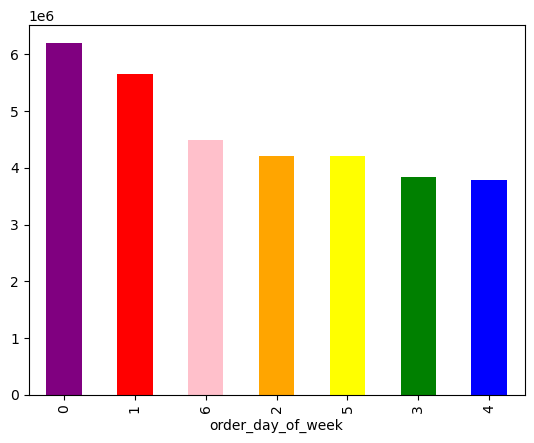

In [11]:
#adding colors to your bar chart
bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [12]:
#exporting outside of jupyter in the form of an image file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

#### Histograms

<Axes: ylabel='Frequency'>

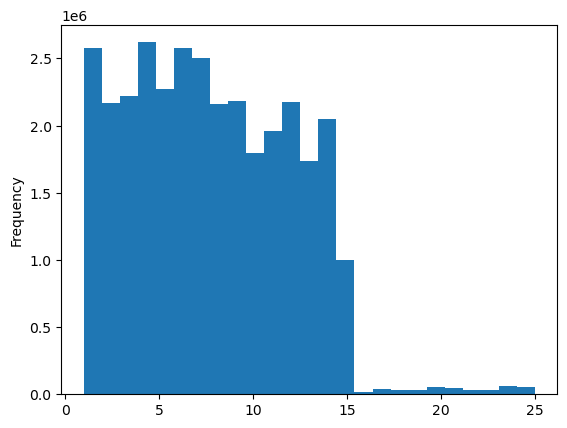

In [14]:
# creating a historgram of the prices column
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

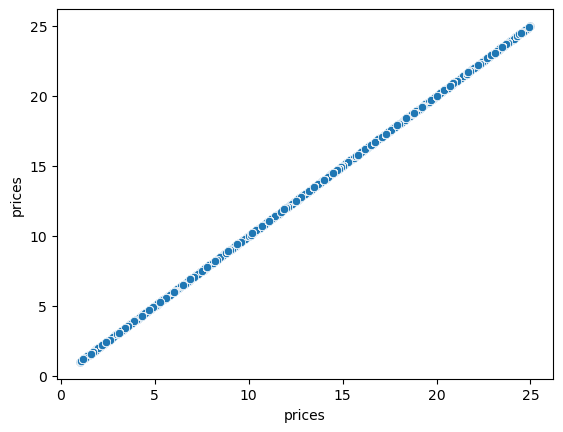

In [15]:
# Creating a scatterplot of prices
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [16]:
#checking for prices over 100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0.1,Unnamed: 0_y,order_id,user_id,...,Busiest_days,Slowest_days,busiest_period_of_day,Busy_days,max_order,loyalty_flag,average_spending,spending_flag,order_regularity,order_frequency_flag


In [17]:
#converting all values of prices above 100 to NaN
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [18]:
#checking for the max price
ords_prods_merge['prices'].max()

25.0

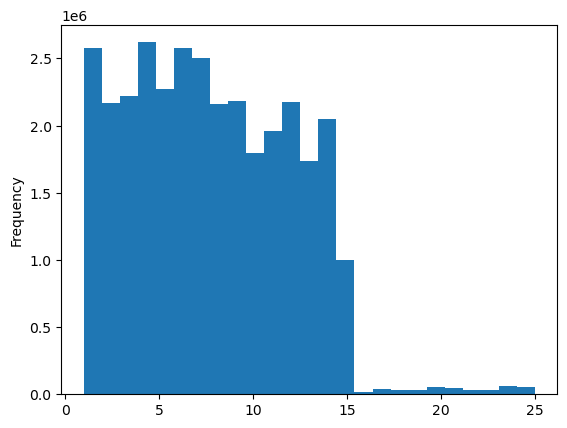

In [19]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

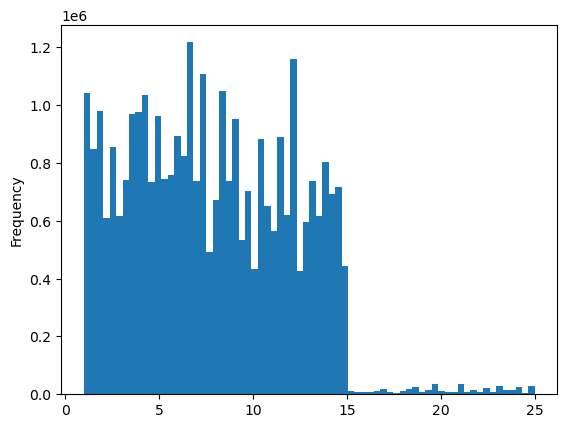

In [20]:
#increasing the bins to 70 to show more detail
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [21]:
#exporting the histogram 
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

#### Line Chart

In [23]:
#creating a random but reproducible pattern with the seed command and creating the 70 in the 70/30 split. THe dev command stores your boolean values—you’ll be getting an output of True or False for every value based on whether it’s less than or equal to 0.7.
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [24]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [25]:
# function produces a list of random numbers between 0 and 1.
np.random.rand(10)

array([0.03818145, 0.22131327, 0.16774014, 0.054419  , 0.59239016,
       0.62623052, 0.01494717, 0.9228723 , 0.16650576, 0.16110305])

In [26]:
#stores 70% of sample in the dataframe big
big = ords_prods_merge[dev]

In [27]:
#stores 30% of sample in the dataframe small
small = ords_prods_merge[~dev]

In [28]:
len(ords_prods_merge)

32405122

In [29]:
#checking length of big and small which should equal to the main df
len(big) + len(small)

32405122

In [30]:
#creating a dataframe the contains onlys and order_day_of_week columns from our small subset
df_2 = small[['order_day_of_week','prices']]

([<matplotlib.axis.XTick at 0x2c01fbb4620>,
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Monday'),
  Text(3, 0, 'Tuesday'),
  Text(4, 0, 'Wednesday'),
  Text(5, 0, 'Thursday'),
  Text(6, 0, 'Friday')])

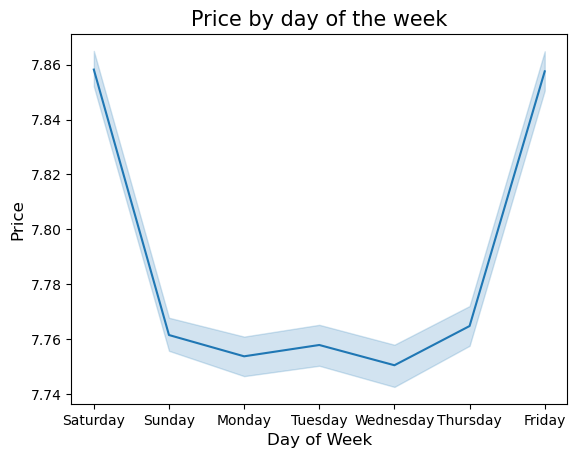

In [31]:
#creating a line chart with the df_2 dataframe that contains the prices and order_day_of_week columns
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

#addting title, labels, and format
plt.title('Price by day of the week', fontsize=15)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=0)

#renaming the x-axis
days_of_week = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
plt.xticks(ticks=range(len(days_of_week)), labels=days_of_week)

In [32]:
#exporting the line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow.png'))